# 1-2. 하스스톤 전설 유저수 변화 데이터 시각화
<pre>
▶ 방법 : matplotlib와 seaborn을 이용한 데이터 시각화
        [※ 선 그래프, 막대 그래프]
</pre>

## 라이브러리

In [55]:
import pandas as pd # 구조화된 데이터나 표 형식의 데이터 분석 및 조작을 위한 라이브러리
import matplotlib.pyplot as plt # 데이터 시각화 라이브러리
import seaborn as sns # Matplotlib을 기반으로 고급화된 시각화 기능을 제공하는 라이브러리
from matplotlib import font_manager, rc # Matplotlib에서 폰트를 설정하기 위한 라이브러리
import numpy as np # 다차원 배열을 처리하고 수치 해석을 위한 라이브러리

# 한글 폰트 설정
font_path = "C:/Windows/Fonts/malgun.ttf"  # 한글 폰트 파일 경로
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# 설정을 완료했다는 출력
print("Setup Complete")

Setup Complete


## 전설 유저수 데이터 가져오기

In [56]:
legend_filepath = "./hs_legend.csv" # 상대경로 지정
legend_data = pd.read_csv(legend_filepath) # .csv 파일 읽기

# 서버 이름을 라벨로 바꾸기
server_labels = {'AP': '아시아', 'EU': '유럽', 'US': '아메리카'} # 서버이름을 변환하기 위한 딕셔너리
legend_data['Server'] = legend_data['Server'].map(server_labels) # Server열의 각 값을 server_labels 딕셔너리로 매핑

# 데이터 헤드와 행,열 개수 확인
print(legend_data.shape)
legend_data.head()

(42, 5)


,Season,Year,Month,Server,Number
0,108,2022,10,아시아,7810
1,108,2022,10,아메리카,10407
2,108,2022,10,유럽,16533
3,109,2022,11,아시아,6745
4,109,2022,11,아메리카,10260


## 1) 하스스톤 전설 유저수 추이 (서버 총합)
<pre>
▶ 기간 : 108시즌(2022.10) ~ 121시즌(2023.11)
▶ 대상 : 해당 시즌 전설 등급 유저수 (서버 총합)
</pre>

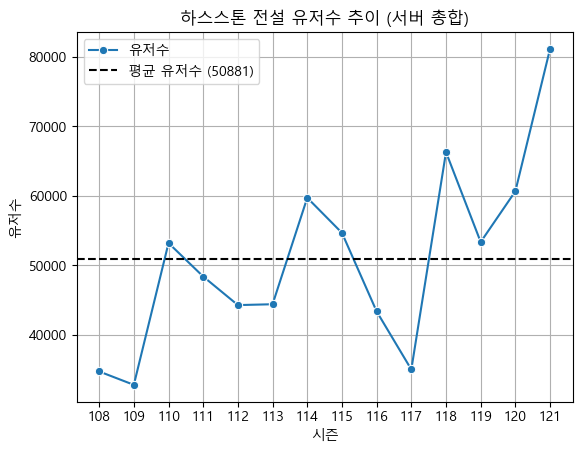

In [57]:
# 시즌을 기준으로 그룹화하고 유저수 총합을 계산한 데이터프레임 생성
total_user = legend_data.groupby('Season')['Number'].sum().reset_index()

# Season을 x축으로, Number를 y축으로 하는 선 그래프 그리기
sns.lineplot(data=total_user, x='Season', y='Number', marker='o', label='유저수') # 선에 marker 표시, 범례에 표시할 레이블은 유저수로 지정

# 각 시즌에 대한 유저 수 총합의 평균 선 그리기
mean_line = total_user['Number'].mean() # total_user의 평균 구하기
plt.axhline(y=mean_line, color='black', linestyle='--', label=f'평균 유저수 ({mean_line:.0f})') # linestyle - 선 스타일, 레이블은 평균유저수 표시

# 그래프 제목과 레이블 추가
plt.title('하스스톤 전설 유저수 추이 (서버 총합)')
plt.xlabel('시즌')
plt.ylabel('유저수')

# 축 및 그리드 설정
plt.xticks(range(108, 122))
plt.grid(True)

# 범례 설정
plt.legend()

# 그래프 출력
plt.show()

## 1) 분석
- 하스스톤 전설 유저수는 증가하는 추세이다.
- 22년 12월, 23년 4월, 8월, 11월 (110, 114, 118, 121시즌)에 전설 유저수가 대폭 증가했다.

## 1-2) 하스스톤 전설 유저수 추이 (서버별)
<pre>
▶ 기간 : 108시즌(2022.10) ~ 121시즌(2023.11)
▶ 대상 : 해당 시즌 전설 등급 유저수 (서버별)
</pre>

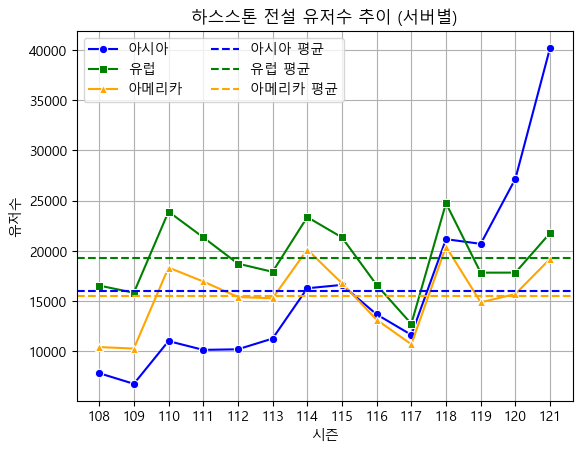

In [58]:
# 서버별 색상 지정
server_colors = {
    '아시아' : 'blue',
    '유럽' : 'green',
    '아메리카' : 'orange'
}

# 서버별 선 마커 지정
server_markers = {
    '아시아' : 'o',
    '유럽' : 's',
    '아메리카' : '^'
}

# Season을 x축으로, Number를 y축으로 하는 선 그래프 그리기
for server, color in server_colors.items():

    # 서버별로 데이터 프레임을 나누기
    server_data = legend_data[legend_data['Server'] == server]
    # 선 그래프 그리기
    sns.lineplot(data=server_data, x='Season', y='Number', label=server, color=color, marker=server_markers[server])

# 각 서버에 대한 유저 수 총합의 평균 계산한 데이터프레임 생성
server_avg = legend_data.groupby('Server')['Number'].mean().reset_index()

# 서버별 평균 선 그리기
for server, color in server_colors.items(): # server_colors 키-값을 사용한 루프
    plt.axhline(
        y=server_avg[server_avg['Server'] == server]['Number'].values[0],  # 서버별 평균 유저 수를 가져옵니다.
        color=color,  # 선 색상
        linestyle='--',  # 선 스타일
        label=f'{server} 평균'  # 범례에 표시할 레이블
    )


# 그래프 제목과 레이블 추가
plt.title('하스스톤 전설 유저수 추이 (서버별)')
plt.xlabel('시즌')
plt.ylabel('유저수')

# 축 및 그리드 설정
plt.xticks(range(108, 122))
plt.grid(True)

# 범례 설정
plt.legend(ncol=2)

# 그래프 출력
plt.show()

## 1-2) 분석
- 서버별 유저수 그래프는 서버 총합 유저수 그래프와 유사한 추세를 보인다.
- 22년 10월(108시즌) ~ 23년 4월(114시즌) 까지는 전설 유저수가 유럽>아메리카>아시아 순이었다.
- 23년 5월(115시즌) ~ 8월(118시즌) 까지는 전설 유저수 순서가 혼조세를 보인다.
- 23년 9월(119시즌) 부터 전설 유저수가 아시아>유럽>아메리카 순을 보이고, 아시아 서버는 최근까지 전설 유저수가 급격히 증가했다.

## 1-3) 중국 서버 종료 전후 평균 전설 유저수 비교
▶ 기간 : 
- 중국 서버 종료 전 - 108시즌(2022.10) ~ 111시즌(2023.01)
- 중국 서버 종료 후 - 112시즌(2023.02) ~ 121시즌(2023.11)

▶ 대상 : 해당 시즌 전설 등급 유저수 (서버 총합)

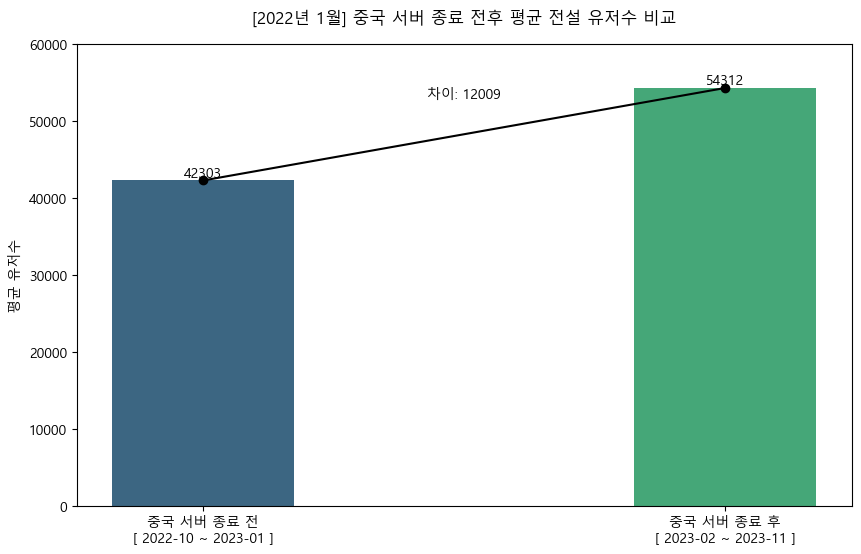

In [59]:
# 108~111 시즌과 112~121 시즌으로 데이터 필터링
season_108_111 = total_user[total_user['Season'].between(108, 111)]
season_112_121 = total_user[total_user['Season'].between(112, 121)]

# 유저 수 평균 계산
mean_108_111 = season_108_111['Number'].mean()
mean_112_121 = season_112_121['Number'].mean()

# 차이 계산
difference = mean_112_121 - mean_108_111

# 막대 그래프 그리기
plt.figure(figsize=(10, 6)) # 그래프 사이즈

# ax - 서브플롯을 나타내는 객체로, 여러 개의 그래프를 그리기 위해 사용
ax = sns.barplot(x=['중국 서버 종료 전\n[ 2022-10 ~ 2023-01 ]', '중국 서버 종료 후\n[ 2023-02 ~ 2023-11 ]'], 
                 y=[mean_108_111, mean_112_121], palette='viridis', width=0.35)

# 막대 끝에 평균 유저수 표시
# enumerate : 순서가 있는 자료형을 입력으로 받아 인덱스와 값을 순회
# enumerate(iterable, start=0) : iterable - 순회가능한 객체, start - 인덱스의 시작값 지정 (기본값 0)
for i, v in enumerate([mean_108_111, mean_112_121]):
    ax.text(i, v + 50, f'{v:.0f}', color='black', ha='center', va='bottom')

# 차이값 표시
ax.text(0.5, max(mean_108_111, mean_112_121), f'차이: {difference:.0f}', ha='center', va='top')

# 선 그래프 그리기
plt.plot([0, 1], [mean_108_111, mean_112_121], marker='o', color='black')

# 그래프 제목과 레이블 설정
plt.title('[2022년 1월] 중국 서버 종료 전후 평균 전설 유저수 비교', pad=15)
plt.ylabel('평균 유저수')

# 축 설정
plt.yticks(np.arange(0, 61000, 10000))

# 그래프 출력
plt.show()

## 1-3) 분석
- 중국 서버 종료 전보다 종료 후의 평균 유저수가 증가했다.

## 서버별 중국 서버 종료 전후 비교를 위한 데이터 정제

In [75]:
# 서버 목록
servers = ['아시아', '유럽', '아메리카']

# 데이터 저장할 딕셔너리 초기화
data = {'서버': servers, '평균_108_111': [], '평균_112_121': []}

# 서버별로 유저 수 평균 계산 및 데이터 추가
for server in servers:

    # 중국 서버 종료 전(108시즌 ~ 111시즌) 데이터 필터링
    mean_108_111 = legend_data[(legend_data['Season'].between(108, 111)) & (legend_data['Server'] == server)]['Number'].mean()
    data['평균_108_111'].append(mean_108_111)
    
    # 중국 서버 종료 후(112~121시즌) 데이터 필터링
    mean_112_121 = legend_data[(legend_data['Season'].between(112, 121)) & (legend_data['Server'] == server)]['Number'].mean()
    data['평균_112_121'].append(mean_112_121)

# 데이터프레임 생성
server_data = pd.DataFrame(data)

# 데이터 헤드와 행,열 개수 확인
print(server_data.shape)
server_data.head()

(3, 3)


,서버,평균_108_111,평균_112_121
0,아시아,8922.25,18882.1
1,유럽,19396.75,19276.6
2,아메리카,13984.00,16153.2


## 1-4) 중국 서버 종료 전후 전설 유저수 평균 비교 (서버별)
▶ 기간 : 
- 중국 서버 종료 전 - 108시즌(2022.10) ~ 111시즌(2023.01)
- 중국 서버 종료 후 - 112시즌(2023.02) ~ 121시즌(2023.11)

▶ 대상 : 해당 시즌 전설 등급 유저수 (서버별)


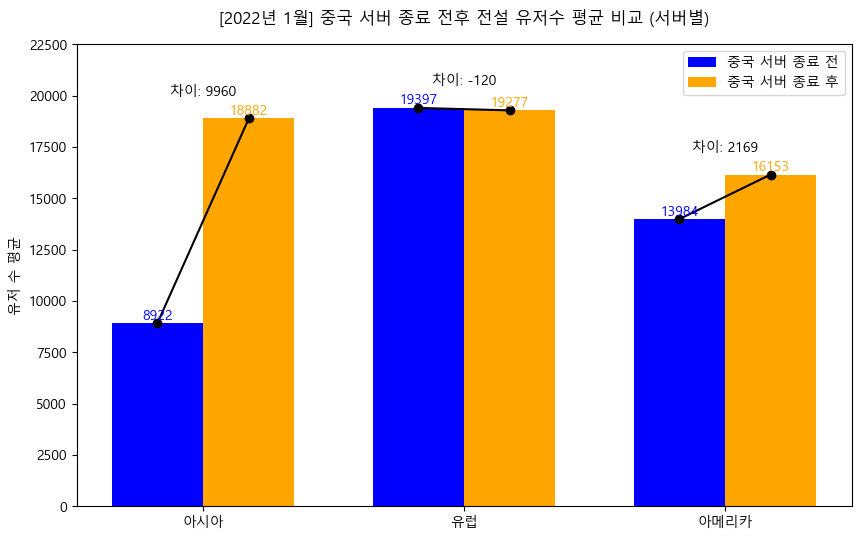

In [62]:
# 그래프 사이즈
plt.figure(figsize=(10, 6))

# 중국 서버 종료 전 (108~111 시즌) 막대 그래프
plt.bar(np.arange(len(server_data['서버'])), server_data['평균_108_111'], color='blue', width=0.35, label='중국 서버 종료 전')

# 중국 서버 종료 후 (112~121 시즌) 막대 그래프
plt.bar(np.arange(len(server_data['서버'])) + 0.35, server_data['평균_112_121'], color='orange', width=0.35, label='중국 서버 종료 후')

# 막대 끝에 평균 유저수 표시
# enumerate : zip 결과 반복
# zip : 중국서버 종료 이전과 이후의 값을 튜플 형태로 묶기
# 인덱스 i일 때, 해당 인덱스에서 v1, v2 값을 가져오기
for i, (v1, v2) in enumerate(zip(server_data['평균_108_111'], server_data['평균_112_121'])):
    # 중국 서버 종료 전 평균 유저수 표시
    plt.text(i, v1 + 50, f'{v1:.0f}', color='blue', ha='center', va='bottom')
    plt.text(i + 0.35, v2 + 50, f'{v2:.0f}', color='orange', ha='center', va='bottom')

# 중국 서버 종료 전후 차이값 표시 및 선 그래프 추가
# 인덱스 i일 때, 해당 인덱스에서 v1, v2값을 가져오기
for i, (v1, v2) in enumerate(zip(server_data['평균_108_111'], server_data['평균_112_121'])):
    # 차이값 표시
    plt.text(i + 0.35 / 2, max(v1, v2) + 1000, f'차이: {(v2 - v1):.0f}', ha='center', va='bottom')
    # 선 그래프 그리기
    plt.plot([i, i + 0.35], [v1, v2], marker='o', color='black')

# 타이틀 및 레이블 설정
plt.title('[2022년 1월] 중국 서버 종료 전후 전설 유저수 평균 비교 (서버별)', pad=15)
plt.ylabel('유저 수 평균')

# 축 설정
plt.xticks(np.arange(len(server_data['서버'])) + 0.35 / 2, server_data['서버'])
plt.yticks(np.arange(0, 22600, 2500))

# 범례 설정
plt.legend(loc='best')

# 그래프 출력
plt.show()

## 1-4) 분석
- 아시아, 아메리카 서버는 중국 서버 종료 전보다 종류 후의 평균 유저수가 많다.
- 유럽 서버는 중국 서버 종료 전후의 평균 유저수의 큰 차이를 보이지 않았다.

## 1-5) 하스스톤 전설 유저수 추이 (월별)
<pre>
▶ 기간 : 108시즌(2022.10) ~ 121시즌(2023.11)
▶ 대상 : 해당 시즌 전설 등급 유저수 (서버 총합)
</pre>

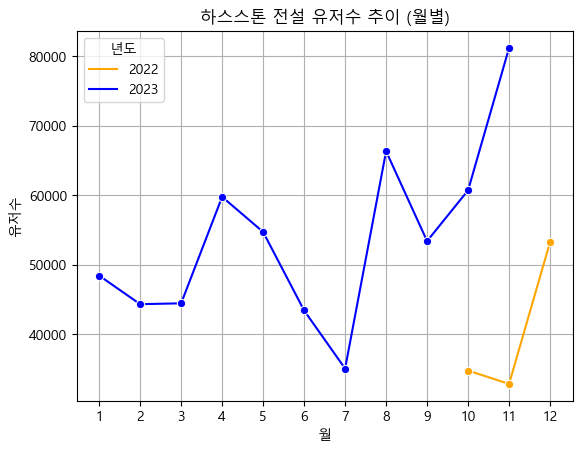

In [63]:
# 각 시즌 및 서버에 대한 유저 수 총합 계산
monthly_data = legend_data.groupby(['Season','Year','Month'])['Number'].sum().reset_index()

# 년도별 색상 지정
colors = {2022 : 'orange', 2023 : 'blue'}

# Month x축으로, Number를 y축으로 하고 Year에 따른 선 그래프 그리기
sns.lineplot(data=monthly_data, x='Month', y='Number', hue='Year', marker='o', palette=colors)

# 타이틀과 레이블 설정
plt.title('하스스톤 전설 유저수 추이 (월별)')
plt.xlabel('월')
plt.ylabel('유저수')

# 축 설정
plt.xticks(range(1,13))
plt.grid(True)

# 범례 설정
plt.legend(title='년도')

# 그래프 표시
plt.show()

## 1-5) 분석
- [22년 11월(109시즌) - 12월(110시즌)], [23년 3월(113시즌) - 4월(114시즌)], [23년 7월(117시즌) - 8월(118시즌)], [23년 10월(120시즌) - 11월(121시즌)]
- 위의 기간들 동안, 유저수가 급증하는 추세를 보인다.

## 확장팩별 발매 전후 비교를 위한 데이터 정제

In [76]:
# '날짜' 열을 생성하고 정렬
legend_data['Time'] = pd.to_datetime(legend_data[['Year', 'Month']].astype(str).agg('-'.join, axis=1))
legend_data['Time'] = legend_data['Time'].dt.to_period("M")

# 각 시즌 및 서버에 대한 유저 수 총합 계산
total_user2 = legend_data.groupby(['Season', 'Time'])['Number'].sum().reset_index()

# 확장팩 발매 월과 이전 월 딕셔너리 생성
expansion_release = {
    '리치왕의진군': ('2022-12', '2022-11'),
    '전설노래자랑': ('2023-04', '2023-03'),
    '티탄': ('2023-08', '2023-07'),
    '황야의땅결투': ('2023-11', '2023-10')
}

# 데이터 프레임 생성
expansion_data = pd.DataFrame(columns=['Expansion', 'Release_Month', 'Previous_Month', 'User_Difference'])

# 데이터 헤드와 행,열 개수 확인
print(expansion_data.shape)
expansion_data.head()


(0, 4)


,Expansion,Release_Month,Previous_Month,User_Difference


## 1-6) 확장팩 발매 전후 전설 유저수 추이
▶ 기간 : 
- 리치왕의 진군 발매 전후[22년 11월(109시즌) - 12월(110시즌)], 
- 전설노래자랑 발매 전후 [23년 3월(113시즌) - 4월(114시즌)], 
- 티탄 발매 전후[23년 7월(117시즌) - 8월(118시즌)], 
- 황야의 땅 결투 발매 전후[23년 10월(120시즌) - 11월(121시즌)]

▶ 대상 : 해당 시즌 전설 등급 유저수 (서버 총합)

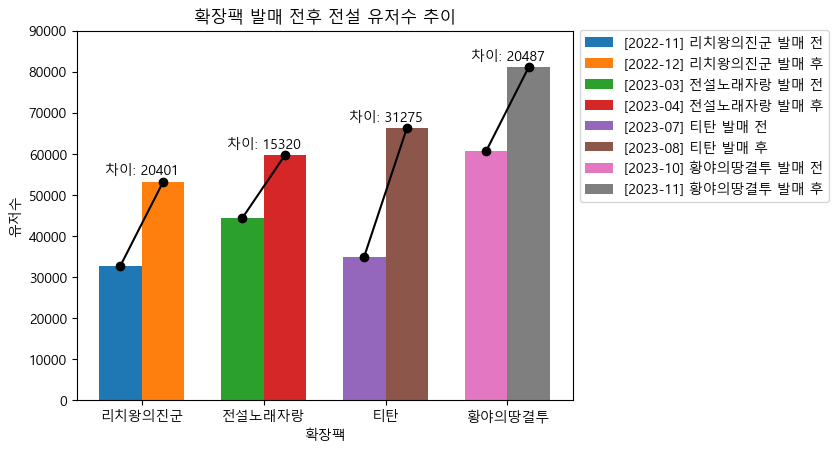

In [103]:
# 그래프 사이즈
plt.figure(figsize=(6.4, 4.8))

bar_width = 0.35 # 막대 너비
expansion_index = np.arange(len(expansion_release)) # 확장팩 인덱스

# 각 확장팩에 대해 데이터 추출 및 그래프 그리기
# enumerate : expansion_release 딕셔너리의 각 항목에 대해 인덱스 i와 값 expansion, (release_month, previous_month)을 반환
for i, (expansion, (release_month, previous_month)) in enumerate(expansion_release.items()):
    
    # 확장팩 발매 월과 이전 월의 유저수 데이터 추출
    release_data = total_user2[total_user2['Time'].astype(str) == release_month]
    previous_data = total_user2[total_user2['Time'].astype(str) == previous_month]

    # 데이터가 존재하는지 확인
    if release_data.empty or previous_data.empty:
      continue

    # 해당 월의 유저 총합 계산
    release_users = release_data['Number'].sum()
    previous_users = previous_data['Number'].sum()

    # 막대 그래프 그리기
    plt.bar(expansion_index[i] - bar_width/2, previous_users, bar_width, label=f'[{previous_month}] {expansion} 발매 전')
    plt.bar(expansion_index[i] + bar_width/2, release_users, bar_width, label=f'[{release_month}] {expansion} 발매 후')

    # 선 그래프 그리기
    plt.plot([expansion_index[i] - bar_width / 2, expansion_index[i] + bar_width / 2],
                [previous_users, release_users], marker='o', color='black')
    
    # 차이값 표시
    plt.text(expansion_index[i], max(previous_users, release_users) + 1000,
                f'차이: {release_users - previous_users}', ha='center', va='bottom')
        
# 타이틀과 레이블 설정
plt.title('확장팩 발매 전후 전설 유저수 추이')
plt.xlabel('확장팩')
plt.ylabel('유저수')

# 축 설정
plt.xticks(expansion_index, expansion_release.keys())
plt.ylim(0,90000)

# 범례 설정
plt.legend(loc='best', bbox_to_anchor=(1.0, 1.02))

# 그래프 출력
plt.show()

## 1-6) 분석
- 확장팩 발매 이전월보다 발매 당월의 유저수가 증가했다.
- 확장팩 발매 전후 증가한 유저수는 티탄 > 황야의 땅 결투 > 리치왕의 진군 > 전설노래자랑 순으로 보인다.